# Identify:
## mtala 5 solution:
### name of students:

עמיר פאעור תז 316540467

עדן דוקצייב תז 316365733


In [21]:
id1 = "316540467"
id2 = "316365733"

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [25]:
df = pd.DataFrame([id1])

Uncomment in case two students are doing the assignment together:

In [26]:
df = pd.DataFrame([id1,id2])

In [27]:
df.to_clipboard(index=False,header=False)

---

----

In [28]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
data.head(5)

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [29]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Q1 

In [30]:
data.pivot_table('total_sold', index='region', columns='year', aggfunc='sum')

year,2015,2016,2017,2018
region,,,,
Albany,4.029896e+06,5.264336e+06,5.231582e+06,1.541986e+06
Atlanta,2.323170e+07,2.832688e+07,2.881512e+07,8.231422e+06
BaltimoreWashington,4.064558e+07,4.089380e+07,4.101563e+07,1.215890e+07
Boise,3.784357e+06,4.653510e+06,4.760561e+06,1.214760e+06
Boston,2.745499e+07,3.057132e+07,3.061067e+07,8.637006e+06
BuffaloRochester,5.893235e+06,7.205112e+06,7.740306e+06,2.123818e+06
California,3.014074e+08,3.261884e+08,3.176445e+08,8.374131e+07
Charlotte,9.487343e+06,1.058672e+07,1.189559e+07,3.585890e+06
Chicago,4.149472e+07,3.961264e+07,4.098075e+07,1.161423e+07


# Q2

In [37]:
Albany=data[data["region"].str.contains("Albany")]
Albany = Albany[Albany["year"]==2016]
Albany

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,conventional,organic
2808,0,25/12/2016,1.52,73341.73,3202.39,58280.33,426.92,11432.09,11017.32,411.83,2.94,conventional,2016,Albany,1,0
2809,1,18/12/2016,1.53,68938.53,3345.36,55949.79,138.72,9504.66,8876.65,587.73,40.28,conventional,2016,Albany,1,0
2810,2,11/12/2016,1.49,71777.85,2323.39,56545.79,86.65,12822.02,12176.75,645.27,0.00,conventional,2016,Albany,1,0
2811,3,04/12/2016,1.48,113031.96,6530.78,99746.05,50.84,6704.29,6476.12,228.17,0.00,conventional,2016,Albany,1,0
2812,4,27/11/2016,1.52,58171.89,2793.99,47106.18,18.14,8253.58,7973.98,279.60,0.00,conventional,2016,Albany,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11980,47,31/01/2016,1.79,1305.94,34.38,186.13,0.00,1085.43,1085.43,0.00,0.00,organic,2016,Albany,0,1
11981,48,24/01/2016,1.83,1506.87,23.39,294.70,0.00,1188.78,1180.98,7.80,0.00,organic,2016,Albany,0,1
11982,49,17/01/2016,1.67,1496.73,66.63,430.17,0.00,999.93,992.14,7.79,0.00,organic,2016,Albany,0,1
11983,50,10/01/2016,1.83,1676.05,35.03,329.33,0.00,1311.69,1311.69,0.00,0.00,organic,2016,Albany,0,1


# Q3

In [32]:
Albany["total_sold"].mean()

50618.61144230772

# Q4

In [33]:
Albany['date'] = pd.DatetimeIndex(Albany.Date).month
september=Albany[Albany['date']==9]
september["Total Bags"].sum()

35000.31

# Q5

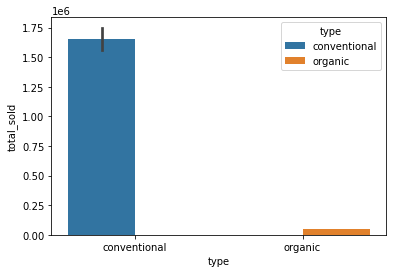

In [34]:
sns.barplot(data=data,x="type",y="total_sold",hue="type" )

# Q6

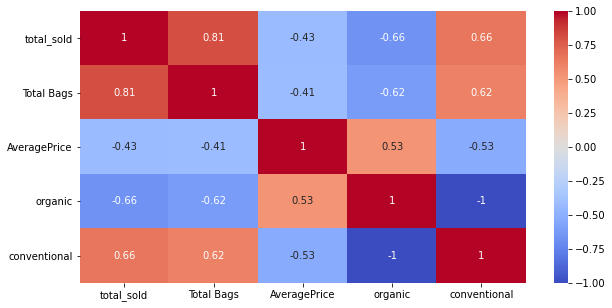

In [35]:
features = ['total_sold', 'Total Bags', 'AveragePrice', 'organic','conventional']
TYPE=pd.get_dummies(data['type'])
data = pd.concat([data,TYPE],axis=1)
corr=data[["total_sold","Total Bags","AveragePrice","organic","conventional"]]
corr=corr.corr(method = 'kendall')
plt.figure(figsize=(10,5)) 
sns.heatmap(corr, cmap='coolwarm', center=0, annot = True)

# Q7

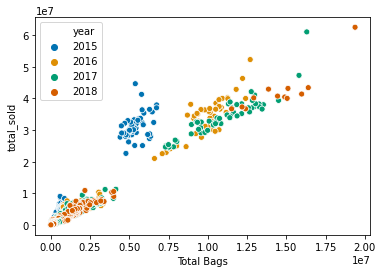

In [36]:
ax = sns.scatterplot(data=data, x="Total Bags", y="total_sold", hue = 'year', palette = 'colorblind')

---
# GOOD LUCK !!!!
---

In [ ]:
# do not type below this line